In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [9]:
salary_one = pd.read_csv('./projectData/DataScientist.csv',encoding='ISO-8859-1')

In [10]:
salary_one.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, weâre on a missio...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


 #                                                1-Data Preprocessing  

In [11]:
# shape
salary_one.shape

(3918, 17)

The dataset is comprised of 607 instances and 11 variables

In [12]:
# columns and data types
salary_one.dtypes

Unnamed: 0           object
index                object
Job Title            object
Salary Estimate      object
Job Description      object
Rating               object
Company Name         object
Location             object
Headquarters         object
Size                 object
Founded              object
Type of ownership    object
Industry             object
Sector               object
Revenue              object
Competitors          object
Easy Apply           object
dtype: object

In [14]:
# drop null values
salary_one = salary_one[salary_one['Salary Estimate'].notnull()]
salary_one

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, weâre on a missio...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3914,3905,4376,Data Analyst Ã¢ Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3915,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3916,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [20]:
#把工资范围两端提取出来
import re
def salaryMin(i):
    number = re.findall("\d+",i) 
    if int(number[0])<int(number[1]):
        return int(number[0])
    else:
        return int(number[1])# 输出结果为列表
salary_one['Salary Min'] = salary_one['Salary Estimate'].apply(salaryMin)
def salaryMax(i):
    num = re.findall("\d+",i)
    if int(num[0])<int(num[1]):
        return int(num[1])
    else:
        return int(num[0])
salary_one['Salary Max'] = salary_one['Salary Estimate'].apply(salaryMax)
salary_one.sample(10)

IndexError: list index out of range

In [16]:
#把工资栏来源删去
def delet(i):
    return i[0:len(i)-17]
salary_one['Salary Estimate'] = salary_one['Salary Estimate'].apply(delet)
salary_one = salary_one[salary_one['Salary Estimate'].notnull()]

# 2-Analysis

In [18]:
# salary distribution
pd.options.plotting.backend = "plotly"
fig = ff.create_distplot(
    [salary_one["Salary Min"],salary_one['Salary Max']],
    ["Salary Min/K","Salary Max/K"],
    bin_size=2)
fig.update_layout(bargap=0.1)

KeyError: 'Salary Min'

Few people earn over 200K

### Salary vs Job Title

In [31]:
salary_one['Job Title'].value_counts()

Data Scientist                                                         274
Data Engineer                                                          260
Data Analyst                                                           246
Senior Data Scientist                                                   91
Senior Data Analyst                                                     47
                                                                      ... 
Phoenix Data Science Tutor Jobs                                          1
Civil Engineer/GIS Data Analyst                                          1
Principal Device Modeling Engineer                                       1
SQL/SAS Data Analyst                                                     1
Patient Safety Physician or Safety Scientist - UK, Europe or the US      1
Name: Job Title, Length: 2079, dtype: int64

In [34]:
#岗位数量排前十的岗位 和
job_title_count=salary_one['Job Title'].value_counts().to_frame()
job_title_count.head(10)
job_title_count.rename(columns={'Job Title': 'value_count'}, inplace = True)
job_title_count.index.name = 'Job Title'
job_title_count.head(10)
main_job=job_title_count.head(8)
main_job

,value_count
Job Title,
Data Scientist,274
Data Engineer,260
Data Analyst,246
Senior Data Scientist,91
Senior Data Analyst,47
Machine Learning Engineer,47
Big Data Engineer,41
Business Intelligence Analyst,39


Text(0.5, 1.0, 'Top DS roles according to job counts')

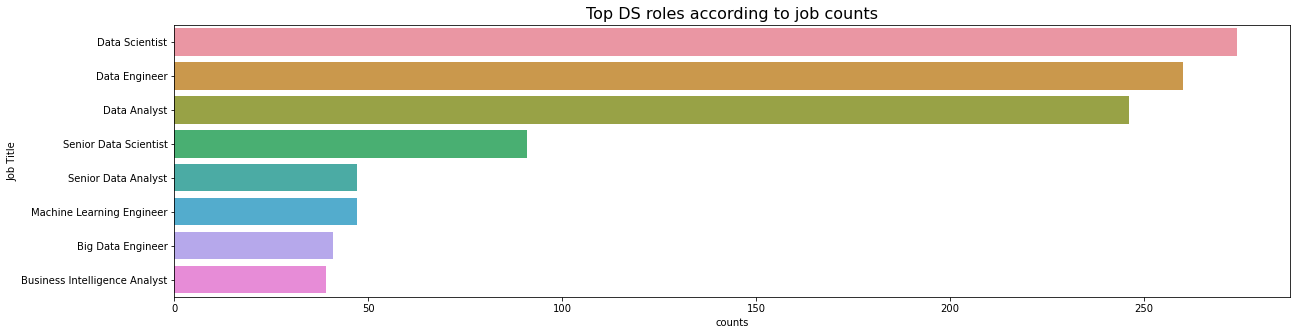

In [37]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=main_job['value_count'],y=main_job.index)
ax.set_xlabel('counts')
ax.set_title('Top DS roles according to job counts', fontdict={'fontsize': 16})

In [237]:
#看不同工作的工资平均情况对比
job_salary = salary_one[['Job Title','Salary Min','Salary Max']]
job_group = job_salary.groupby(['Job Title'])
job_salary_one = job_group.mean()
#将两个表聚合在一起，列为工作名称
df1 = pd.merge(main_job,job_salary_one,left_on='Job Title',right_on='Job Title')
df1

,Salary Min,Salary Max
Job Title,,
#104733 HPC Systems and Data Engineer,74.0,129.0
#105054 (CLS) Clinical Lab Scientist - Microbiology,39.0,69.0
(CLS) Clinical Lab Scientist - Microbiology,39.0,69.0
(Data Analyst) BA/BSA,84.0,156.0
(Data Risk Analyst: Data Modeler),39.0,71.0
...,...,...
X-Ray Tomography Scientist,113.0,184.0
XYZ Data Analyst,55.0,117.0
eCommerce Analytics Manager,96.0,119.0


Text(0.5, 1.0, 'top 10 data science roles with mean max salary')

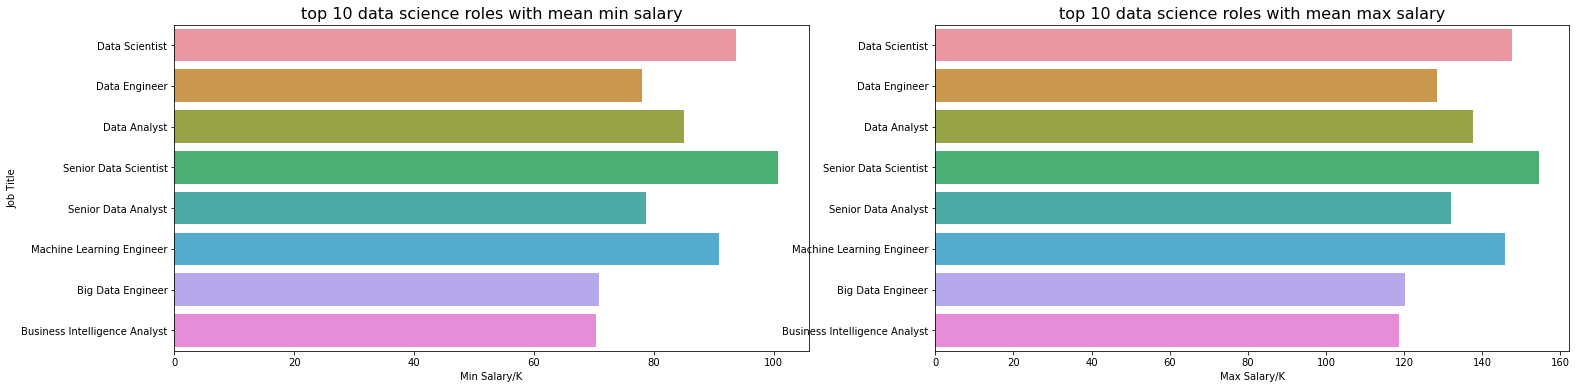

In [50]:
plt.figure(figsize=(25, 6))

# top 10 data science roles with mean min salary
plt.subplot(1, 2, 1)
ax = sns.barplot(y=df1.index, x=df1['Salary Min'])
ax.set_xlabel('Min Salary/K')
ax.set_title('top 10 data science roles with mean min salary', fontdict={'fontsize': 16})

# top 10 data science roles with mean max salary
plt.subplot(1, 2, 2)
ax = sns.barplot(x=df1['Salary Max'], y=df1.index)
ax.set_xlabel('Max Salary/K')
ax.set_ylabel('')
ax.set_title('top 10 data science roles with mean max salary', fontdict={'fontsize': 16})

In [44]:
df2 = df
df2.head(10)

,value_count,Salary Min,Salary Max
Job Title,,,
Senior Data Scientist,91,100.780220,154.582418
Data Scientist,274,93.795620,147.671533
Machine Learning Engineer,47,90.914894,145.808511
Data Analyst,246,85.036585,137.552846
Senior Data Analyst,47,78.723404,132.000000
Data Engineer,260,78.076923,128.315385
Big Data Engineer,41,70.804878,120.146341
Business Intelligence Analyst,39,70.358974,118.615385


Text(0.5, 1.0, 'Top DS roles according to Max salary')

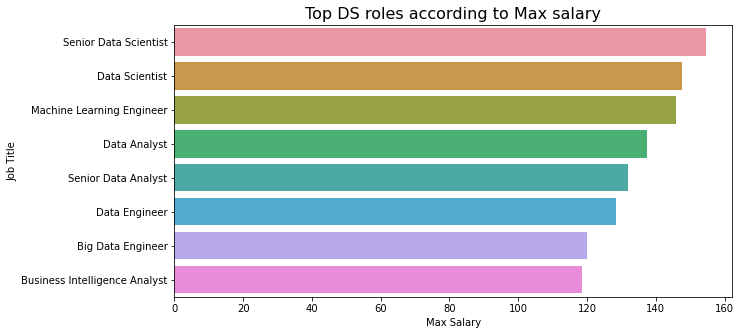

In [53]:
plt.figure(figsize=(10, 5))

# top 10 data science roles according to mean salary
ax = sns.barplot(y=df2.index, x=df2['Salary Max'])
ax.set_xlabel('Max Salary')
ax.set_title('Top DS roles according to Max salary', fontdict={'fontsize': 16})

In [54]:
#工作分类
#通过观察，大部分职位名称含有
#1.data scientist 2.data engineer 3.data analyst
#可先按照这三个大类别进行分组，含有关键词的都是该领域内的工作
def divide1(s):
    if 'Scientist'in s:
        return True
    else:
        return False
def divide2(s):
    if 'Engineer'in s:
        return True
    else:
        return False
def divide3(s):
    if 'Analyst'in s:
        return True
    else:
        return False    
q = salary_one['Job Title'].apply(divide1) 
w = salary_one['Job Title'].apply(divide2)
e = salary_one['Job Title'].apply(divide3)
Scientist = salary_one[q]
Engineer = salary_one[w]
Analyst = salary_one[e]

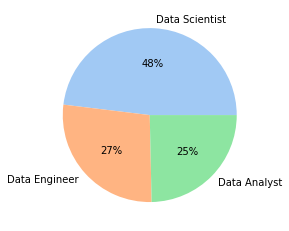

In [66]:
#三个工作大类的占比
a = [Scientist.size,Engineer.size,Analyst.size]
s = pd.Series(a,index=['Data Scientist','Data Engineer','Data Analyst'],dtype='int64')
colors = sns.color_palette('pastel')[0:5]
plt.pie(s.values, labels = s.keys(), colors = colors, autopct='%.0f%%')
plt.show()

Data Scientist 占主要部分，其他两个大类持平

Text(0.5, 1.0, 'Salary in DA Feilds')

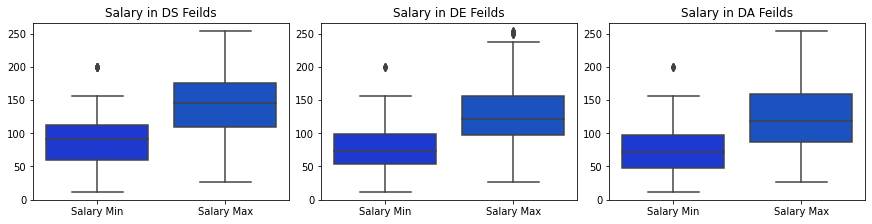

In [89]:
fig, ax =plt.subplots(1,3,constrained_layout=True, figsize=(12, 3))
axesSub = sns.boxplot(data = Scientist.loc[:, ['Salary Min', 'Salary Max']],ax=ax[0])
axesSub.set_title('Salary in DS Feilds')
axesSub = sns.boxplot(data = Engineer.loc[:, ['Salary Min', 'Salary Max']],ax=ax[1])
axesSub.set_title('Salary in DE Feilds')
axesSub = sns.boxplot(data = Analyst.loc[:, ['Salary Min', 'Salary Max']])
axesSub.set_title('Salary in DA Feilds')


### Salary vs Company Size

In [95]:
#先把size中的null值和-1去掉
df3 =salary_one[salary_one['Size'] != '-1']
df3 = df3[df3['Size'].notnull()]

In [96]:
#以表格中的人数下限来当作公司规模的一个指标
#公司规模粗划分：1-50  51-200 201-500 501-1000 1001-5000 5001-10000
def companyScale(i):
    number = re.findall("\d+",i) 
    return number   

In [98]:
df3['SIZE']=df3['Size'].apply(companyScale)

In [105]:
size_g = df3.groupby('Size')
size_1 = size_g.get_group('1 to 50 employees')
size_2=size_g.get_group('51 to 200 employees')
size_3 = size_g.get_group('201 to 500 employees')
size_4 = size_g.get_group('501 to 1000 employees')
size_5 = size_g.get_group('1001 to 5000 employees')
size_6 = size_g.get_group('5001 to 10000 employees')
size_7 = size_g.get_group('10000+ employees')
s = [size_1.size,size_2.size,size_3.size,size_4.size,size_5.size,size_6.size,size_7.size]
s

[11000, 11260, 8360, 6140, 11060, 4380, 19860]

In [122]:
#不同大小公司的数量
plt.figure(figsize=(10,6))
g = ['1-50','51-200','201-500','501-1000','1001-5000','5001-10000','1000+']
k = pd.Series(s,index=g,name='This is a series',dtype='float64')
fig = px.histogram(k,x=k.index,y=k.values)
fig.update_xaxes(title="Company Size")
fig.update_yaxes(title="Count")

<Figure size 720x432 with 0 Axes>

In [141]:
size1_min = size_1['Salary Min'].mean()
size1_max = size_1['Salary Max'].mean()
size2_min = size_2['Salary Min'].mean()
size2_max = size_2['Salary Max'].mean()
size3_min = size_3['Salary Min'].mean()
size3_max = size_3['Salary Max'].mean()
size4_min = size_4['Salary Min'].mean()
size4_max = size_4['Salary Max'].mean()
size5_min = size_5['Salary Min'].mean()
size5_max = size_5['Salary Max'].mean()
size6_min = size_6['Salary Min'].mean()
size6_max = size_6['Salary Max'].mean()
size7_min = size_7['Salary Min'].mean()
size7_max = size_7['Salary Max'].mean()
a = [size1_min,size2_min,size3_min,size4_min,size5_min,size6_min,size7_min]
b = [size1_max,size2_max,size3_max,size4_max,size5_max,size6_max,size7_max]

Text(0, 0.5, 'Average Salary(Max,Min)/K')

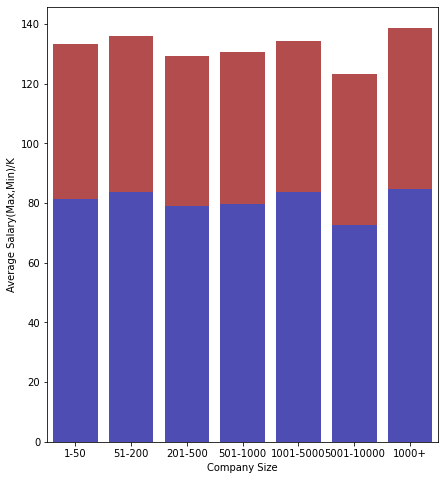

In [161]:
plt.figure(figsize=(7,8))
df = pd.DataFrame({'size':g,'min':a,'max':b})
ax = sns.barplot(x = 'size',y = 'max',data = df,color = 'red',saturation=0.40,errwidth=0.1)
ax = sns.barplot(x='size',y = 'min',data = df,color = 'blue',saturation=0.40)
ax.set_xlabel('Company Size')
ax.set_ylabel('Average Salary(Max,Min)/K')

在这个数据集中工资和公司大小没有明显关系，但是比较来看10000+员工规模的公司工资的下限和上限都是最高的

## Salary vs Rates

In [162]:
salary_one.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,0,0,Senior Data Scientist,$111K-$181K,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,111,181
1,1,1,"Data Scientist, Product Analytics",$111K-$181K,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,111,181
2,2,2,Data Science Manager,$111K-$181K,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,111,181
3,3,3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,111,181
4,4,4,"Director, Data Science",$111K-$181K,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,111,181


In [171]:
#先把坏值给去掉
df4 = salary_one[salary_one['Rating']!= -1.0]
df4 = df4[df4['Rating'].notnull()]

In [186]:
#看看rating和salary有没有关系
plt.figure(figsize=(10,10))
fig=px.scatter(df4, x = 'Rating', y = ['Salary Min','Salary Max'],trendline = "ols")
fig
fig.update_layout(title="Salary vs Rating",yaxis_title="Average Salary",font=dict(family="Courier New, monospace",size=18,color="#7f7f7f"))

<Figure size 720x720 with 0 Axes>

In [178]:
results = px.get_trendline_results(fig)
for (_, i, t) in results.itertuples():
    #print("Maternal Smoker = ", i)
    print(t.summary())
    print("\n\n")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     20.79
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           5.31e-06
Time:                        01:15:34   Log-Likelihood:                -17341.
No. Observations:                3500   AIC:                         3.469e+04
Df Residuals:                    3498   BIC:                         3.470e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.9742      3.619     18.228      0.0

拟合曲线斜率为正，一个为5.82095，另一个为4.30445 可以看出rating越高，工资大概率就会越高

## Salary vs Location

In [189]:
#先把location的坏值去掉
df5 = salary_one[salary_one['Location'].notnull()]
df5 = df5[df5['Location'] != "-1"]

In [192]:
#统计一下工作地点都有哪些
df5['Location'].value_counts()
location_count=df5['Location'].value_counts().to_frame()
location_count.head(10)
location_count.rename(columns={'Location': 'value_count'}, inplace = True)
location_count.index.name = 'Location'
location_count.head(10)

,value_count
Location,
"Austin, TX",345
"Chicago, IL",330
"San Diego, CA",304
"New York, NY",303
"Houston, TX",219
"Philadelphia, PA",210
"Los Angeles, CA",206
"Dallas, TX",180
"San Antonio, TX",177


Text(0.5, 1.0, 'Top 10 countries having most DS job opportunities')

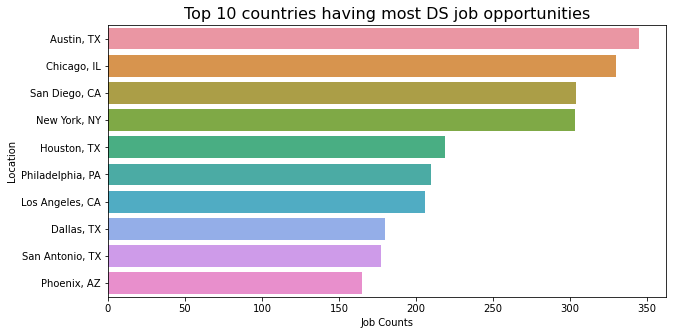

In [194]:
plt.figure(figsize=(10, 5))


ax = sns.barplot(y=location_count.head(10).index, x=location_count.head(10)['value_count'])
ax.set_xlabel('Job Counts')
ax.set_title('Top 10 countries having most DS job opportunities', fontdict={'fontsize': 16})

这十个地方相关工作岗位最多

([<matplotlib.patches.Wedge at 0x2180854e100>,
 [Text(-0.20611945413751356, 1.080515974257694, 'New York, NY'),
  Text(-0.8899186877588755, -0.6465637858537403, 'Redwood City, CA'),
  Text(-0.5299290419631386, -0.9639373478001723, 'Santa Clara, CA'),
  Text(-0.1378665666275815, -1.0913261702196657, 'Palo Alto, CA'),
  Text(0.27355885742688185, -1.0654414819797937, 'San Jose, CA'),
  Text(0.6465637546086649, -0.8899187104597511, 'Mountain View, CA'),
  Text(0.8899186726249572, -0.6465638066837909, 'Sunnyvale, CA'),
  Text(0.9953097403915675, -0.4683572575306918, 'Queens Village, NY'),
  Text(1.0461621543988369, -0.33991873544067014, 'Rockville Centre, NY'),
  Text(1.0805159670208322, -0.2061194920744666, 'Menlo Park, CA'),
  Text(1.097829398134719, -0.06906962133355556, 'Fremont, CA')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56%'),
  Text(-0.48541019332302293, -0.3526711559202219, '8%'),
  Text(-0.28905220470716647, -0.525784007891003, '6%'),
  Text(-0.07519994543322628, -0.5

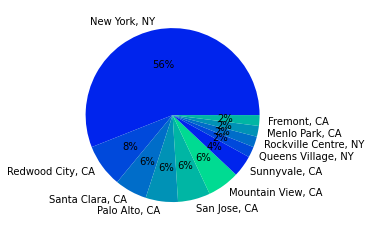

In [205]:
#根据工资高低排序，找出工资最高的50个工作地点
df6 = salary_one.sort_values(by='Salary Max',ascending = False)
df7 = df6['Location'].head(50)
m = df7.value_counts()
#colors = sns.color_palette('pastel')[0:15]
plt.pie(m.values, labels = m.keys(),  autopct='%.0f%%')

可以看出，在这个领域中的高工资岗位，绝大部分分布在New York,NY

In [209]:
#Headquarters再看看总部
df8 = salary_one[salary_one['Headquarters'].notnull()]
df8 = df8[df8['Headquarters'] != "-1"]
df8['Headquarters'].value_counts()
location1_count=df8['Headquarters'].value_counts().to_frame()
location1_count.head(10)
location1_count.rename(columns={'Headquarters': 'value_count'}, inplace = True)
location1_count.index.name = 'Headquarters'
location1_count.head(10)

,value_count
Headquarters,
"New York, NY",297
"San Diego, CA",179
"Chicago, IL",158
"Austin, TX",106
"Los Angeles, CA",87
"Houston, TX",83
"San Antonio, TX",77
"Philadelphia, PA",67
"Irving, TX",62


Text(0.5, 1.0, 'Top 10 Main Headquarters')

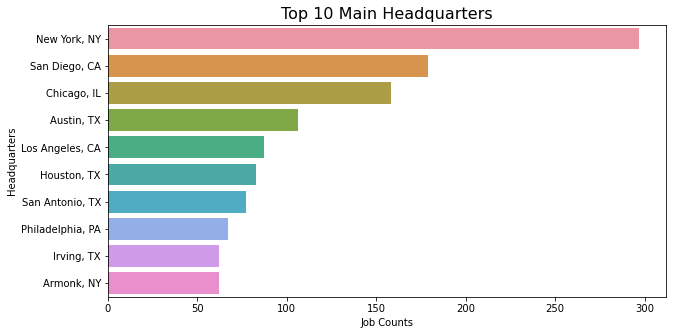

In [210]:
plt.figure(figsize=(10, 5))


ax = sns.barplot(y=location1_count.head(10).index, x=location1_count.head(10)['value_count'])
ax.set_xlabel('Job Counts')
ax.set_title('Top 10 Main Headquarters', fontdict={'fontsize': 16})

([<matplotlib.patches.Wedge at 0x21806f7afa0>,
 [Text(-0.5060716130681925, 0.9766737031611724, 'New York, NY'),
  Text(-0.5060713958915504, -0.9766738156930276, 'Stockholm, Sweden'),
  Text(-0.22380144830843637, -1.0769925309560167, 'Walpole, MA'),
  Text(0.07506682948670045, -1.097435634153919, 'Fair Lawn, NJ'),
  Text(0.36836774374059317, -1.0364869537873909, 'Dublin, Ireland'),
  Text(0.6343485066001245, -0.8986667748249025, 'Ventura, CA'),
  Text(0.853282540934732, -0.6941965898331449, 'Piscataway, NJ'),
  Text(1.0089325103732598, -0.43824101760550904, 'Mountain View, CA'),
  Text(1.0897545683063177, -0.14978311271806102, 'Rockville Centre, NY')],
 [Text(-0.2760390616735595, 0.5327311108151849, '65%'),
  Text(-0.2760389432135729, -0.5327311721961968, '4%'),
  Text(-0.12207351725914709, -0.5874504714305545, '4%'),
  Text(0.04094554335638206, -0.5986012549930467, '4%'),
  Text(0.2009278602221417, -0.5653565202476677, '4%'),
  Text(0.34600827632734066, -0.4901818771772195, '4%'),
  Te

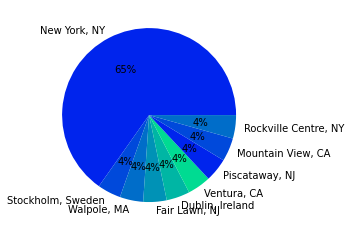

In [215]:
df9 = df8.sort_values(by='Salary Max',ascending = False)
df10 = df9['Headquarters'].head(23)
l = df10.value_counts()
#colors = sns.color_palette('pastel')[0:15]
plt.pie(l.values, labels = l.keys(),  autopct='%.0f%%')

# 这部分上下代码和思路时完全一样的，回头把图放在一起

## Salary vs Ownership

In [216]:
salary_one.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,0,0,Senior Data Scientist,$111K-$181K,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,111,181
1,1,1,"Data Scientist, Product Analytics",$111K-$181K,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,111,181
2,2,2,Data Science Manager,$111K-$181K,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,111,181
3,3,3,Data Analyst,$111K-$181K,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,111,181
4,4,4,"Director, Data Science",$111K-$181K,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,111,181


In [226]:
#把Type of ownership一列的坏值给去掉
df_1 = salary_one[salary_one['Type of ownership'].notnull()]
df_1 = df_1[df_1['Type of ownership'] != "Unknown"]
df_1 = df_1[df_1['Type of ownership'] != "-1"]
df_1 = df_1[df_1['Type of ownership'] != "Franchise"]

In [227]:
#取工资的最大值
px.violin(df_1, y="Salary Max", x='Type of ownership')

In [229]:
#取工资的最小值
px.violin(df_1, y="Salary Min", x='Type of ownership')

从图中可以看出，school/school District 的工资跨度最大，other organization 的工资跨度最小，hospital的工资比较集中

# Salary vs Sector

In [240]:
#查看工作涉及的主要领域方向
df_2 = salary_one[salary_one['Sector']!="-1"]
job_sector_count = df_2['Sector'].value_counts().to_frame()

job_sector_count.rename(columns={'Sector': 'value_count'}, inplace = True)
job_sector_count.index.name = 'Sector'
job_sector_count.head(10)

,value_count
Sector,
Information Technology,1124
Business Services,679
Biotech & Pharmaceuticals,293
Finance,270
Health Care,197
Insurance,109
Education,101
Manufacturing,87
Government,82


In [241]:
#看不同工作的工资平均情况对比
job_salary = df_2[['Sector','Salary Min','Salary Max']]
job_group = job_salary.groupby(['Sector'])
job_salary_one1 = job_group.mean()
#将两个表聚合在一起，列为工作名称
df_3 = pd.merge(job_sector_count.head(10),job_salary_one1,left_on='Sector',right_on='Sector')
df_3

,value_count,Salary Min,Salary Max
Sector,,,
Information Technology,1124,89.223310,142.075623
Business Services,679,77.091311,127.273932
Biotech & Pharmaceuticals,293,80.767918,139.098976
Finance,270,77.525926,127.503704
Health Care,197,73.807107,122.664975
Insurance,109,78.963303,128.477064
Education,101,71.564356,123.118812
Manufacturing,87,84.149425,136.252874
Government,82,75.500000,128.707317


Text(0.5, 1.0, 'top 10 DS feilds with mean max salary')

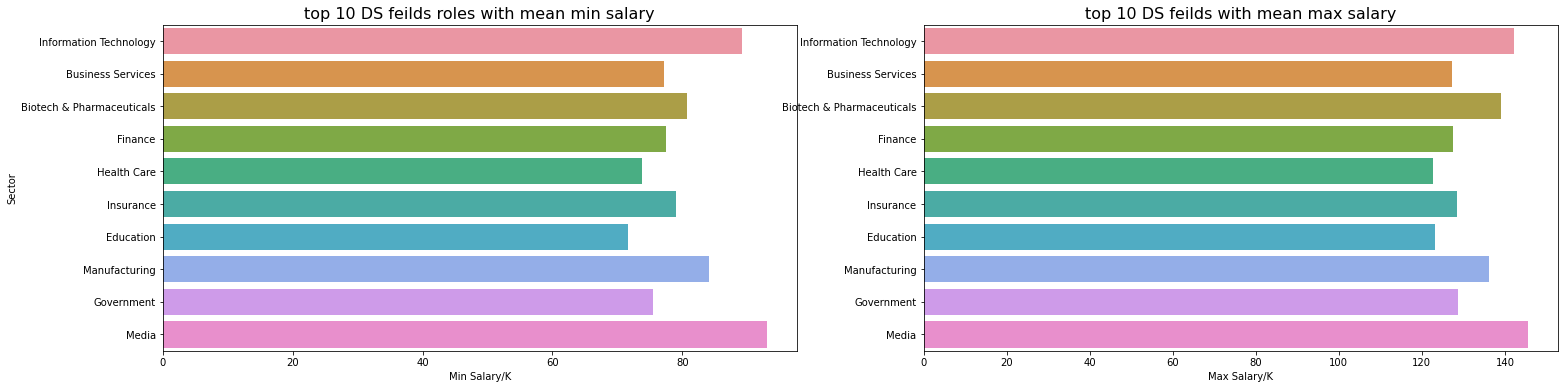

In [243]:
plt.figure(figsize=(25, 6))

# top 10 data science roles with mean min salary
plt.subplot(1, 2, 1)
ax = sns.barplot(y=df_3.index, x=df_3['Salary Min'])
ax.set_xlabel('Min Salary/K')
ax.set_title('top 10 DS feilds roles with mean min salary', fontdict={'fontsize': 16})

# top 10 data science roles with mean max salary
plt.subplot(1, 2, 2)
ax = sns.barplot(x=df_3['Salary Max'], y=df_3.index)
ax.set_xlabel('Max Salary/K')
ax.set_ylabel('')
ax.set_title('top 10 DS feilds with mean max salary', fontdict={'fontsize': 16})